#### [ML with Python] 3. 비지도 학습 알고리즘 (3-2) 병합 군집
- 본 포스팅은 k-평균 군집에 관한 기본적인 내용에 관하여 다룹니다.
- 병합 군집(`agglomerative clustering`) 
- 계층형 군집과 덴드로그램


___

필요 라이브러리 import

In [7]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
plt.rc('font', family='Malgun Gothic')

---

<br>

#### <u>병합 군집 (agglomerative clustering)</u>

- 기본 원리 순서
    - <b>STEP 1</b> : 각 포인트를 하나의 클러스터로 지정
    - <b>STEP 2</b> : 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 계속 합침
- `linkage` 옵션 : 가장 비슷한 클러스터를 측정하는 방법 지정
    - `ward` : <u>분산을 가장 적게 증가시키는</u> 두 클러스터를 합친다.
    - `average` : <u>포인트 사이의 평균 거리가 가장 짧은</u> 두 클러스터를 합친다.
    - `complete` : <u>클러스터 포인트 사이의 최대 거리가 가장 짧은</u> 두 클러스터를 합친다.
    - 일반적인 경우에는 `ward`가 대부분의 데이터셋에 알맞지만, 클러스터에 속한 포인트 수가 많이 다를 때는 (ex.클러스터의 크기가 매우 다를 때) `average`나 `complete`가 나을 수 있다. 즉 linkage 옵션은 데이터 타입 별로 적합성이 다를 수 있다.
    - 이와 관련해서는 해당 [블로그](https://bizzengine.tistory.com/152)에서 시각적으로 잘 정리되어있다.<br>(많은 참고가 되었습니다 감사합니다...!)<br> 

<br>

예시를 통해 이를 이해하면 다음과 같다. 다음은 `ward`옵션을 적용한 `병합 군집`의 경과를 보여준다. 초기에는 각 하나의 포인트가 클러스터를 이루고 있지만, 각 단계가 거듭할 때 마다, 클러스터가 합쳐지는 것을 확인할 수 있다. 그리고 마지막 단계에서 세 개의 클러스터를 찾는다고 지정했을 때 클러스터 3개만을 구성하며 알고리즘이 멈추게 된다.

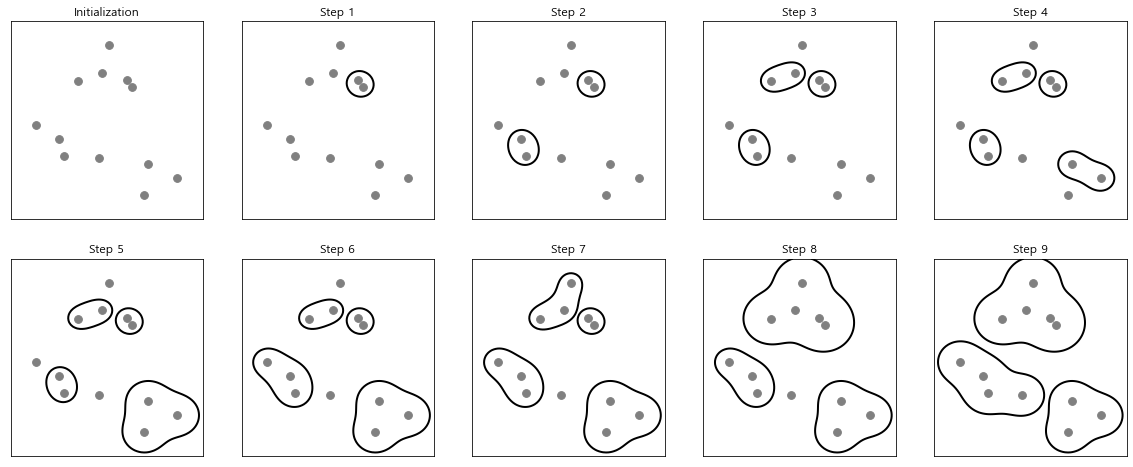

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

<br>

알고리즘 특성상 `병합 군집`은 새로운 데이터 포인트에 대해서는 예측할 수 없다. 따라서 `predict` 메소드가 해당 알고리즘에는 존재하지 않는다. 대신 훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해서 `fit_predict` 메소드를 사용한다. 이전 `K평균 군집`에서 봤듯이, `fit_predict`는 훈련 세트를 학습시킨 뒤 얻은 레이블들을 반환한다.

Text(0, 0.5, '특성 1')

C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


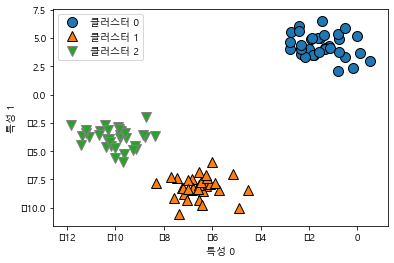

In [4]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

위와 같이 결과를 완벽하게 도출하였다. `병합 군집`모델을 사용하려면 찾을 클러스터의 개수를 지정해주는 것을 위의 코드에서 확인할 수 있었다. <u>이렇게 사람들이 자의적으로 지정해줘야만 할 것 같은 클러스터의 개수는 의외로 `병합 군집`에서는 적절한 개수를 선택하는데 도움을 주기도 한다.</u>

<br>

---

#### <u>계층형 군집과 덴드로그램</u>

`병합 군집`은 `게층형 군집(hierarchical clustering)`을 만든다. 이것은 계층적 트리 모형을 이용해 개별 객체들을 순차적/계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘이다. 이는 가능한 모든 클러스터를 연결해보는 데 큰 도움이 된다. 또한, `SciPy`의 `덴드로그램 (dendrogram)`을 통하여 직관적으로 나타낼 수 있다. 더불어, `SciPy`는 데이터 배열 X를 받아 계층 군집의 유사도가 들어있는 연결 배열 반환 함수를 제공하기도 한다(ex. `ward()`, `average()`, `complete()`). 이 연결 배열을 `dendrogram` 함수에 넣어 덴드로그램 그래프를 시각화 할 수 있다.

Text(0, 0.5, '클러스터 거리')

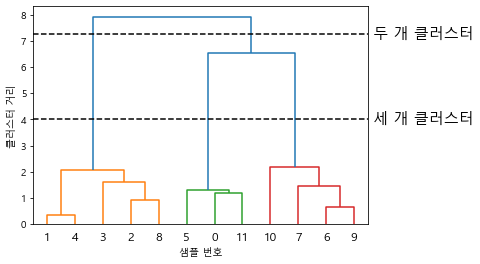

In [5]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

덴드로그램에서 살펴봐야 할 것은 다음과 같다.
- y축의 높이 : 노드가 만들어진 순서 파악 가능
- 가지의 길이 : 클러스터가 얼마나 멀리 떨어져 있는지 파악 가능
    - 가지가 가장 길다는 것은 꽤 먼 거리의 포인트를 모은다는 의미이다.
    
<br>

위의 덴드로그램은 최종적으로 1개의 군집으로 모든 데이타를 군집화 시키는 것을 확인할 수 있다. 따라서, 적정선의 특정 n개의 클러스터까지 군집으로 나눌 필요가 있다. 이떄, `sklearn`의 `fcluster`함수를 이용하면, 특정 클러스터 거리에서(</u>클러스터 갯수가 아니다!!!</u>)에서 클러스터링을 멈출 수 있다. 다음의 코드를 확인해보자.

In [50]:
list(df['real_label']==df['predict'])

[True, True, False, True, True, True, False, True, True, True, True, True]

In [52]:
def sub(df):
    return df[0] - 1

import pandas as pd
from scipy.cluster.hierarchy import fcluster
predict = pd.DataFrame(fcluster(linkage_array, t = 4, criterion = 'distance'))
predict = pd.DataFrame(predict.apply(sub, axis = 1))
predict.columns = ['predict']

df = pd.DataFrame({'X0' : X[:, 0].tolist(),
                   'X1' : X[:, 1].tolist(),
                   'real_label': y.tolist()})

df = pd.merge(df, predict, left_index = True, right_index = True, how = 'left')
df['condition'] = list(df['real_label']==df['predict'])
df

,X0,X1,real_label,predict,condition
0,3.549347,0.692505,1,1,True
1,1.926358,4.152430,0,0,True
2,0.005875,4.387241,2,0,False
3,1.120314,5.758061,0,0,True
4,1.737308,4.425462,0,0,True
5,2.368335,0.043568,1,1,True
6,-0.497722,1.551282,1,2,False
7,-1.481145,2.730698,2,2,True
8,0.873051,4.714386,0,0,True
9,-0.662468,2.175717,2,2,True


각 데이터 포인트의 예측값을 위에서 확인했을 때, 총 3개의 클러스터가 예측되는 것을 확인할 수 있다. 또한 11개 중에서 2개를 제외하고 전부 휼륭히 예측하였다. 

<br>

하지만, 이렇게 유용해 보이는 `병합군집`은 two_moons와 같은 복잡한 형상은 구분하지 못한다. 그리고 데이터가 많아질수록 다른 클러스터 기법들에 비해 많이 느린편에 해당한다.

<br>

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- [fcluster 문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)
- [ratio's blog](https://ratsgo.github.io/machine%20learning/2017/04/18/HC/)
- [인문계 공돌이](https://bizzengine.tistory.com/152)